#Checkpoint 3 | By Pedro Henrique Fernandes Lô de Barros - RM97937

###Importação de Módulos

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

###Carregamento do Data Frame e renomeação de suas colunas

In [ ]:
# Objetivo do script: prever a idade de um abalone (molusco) podendo ser obtido ao contar o número de anéis.

url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

data_frame = pd.read_csv(url, header=None) # header=None indica que a primeira linha do arquivo csv não representa as colunas dos dados.

# Atribuindo nomes mais significativos às colunas:
data_frame.columns = [
    'sexo',
    'comprimento',
    'diâmetro',
    'altura',
    'peso total',
    'peso descascado',
    'peso das víceras',
    'peso da concha',
    'anéis'
]

###Análise do Data Frame com Histograma e Matriz de Correlação

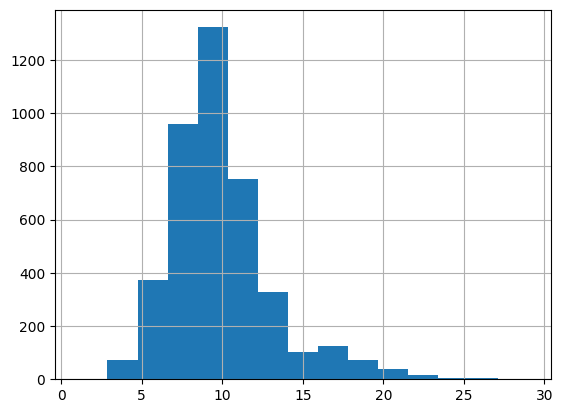

In [ ]:
# Plotando um histograma com o número de anéis dos abalones, a fim de verificar  padrões:
data_frame['anéis'].hist(bins=15)
plt.show()

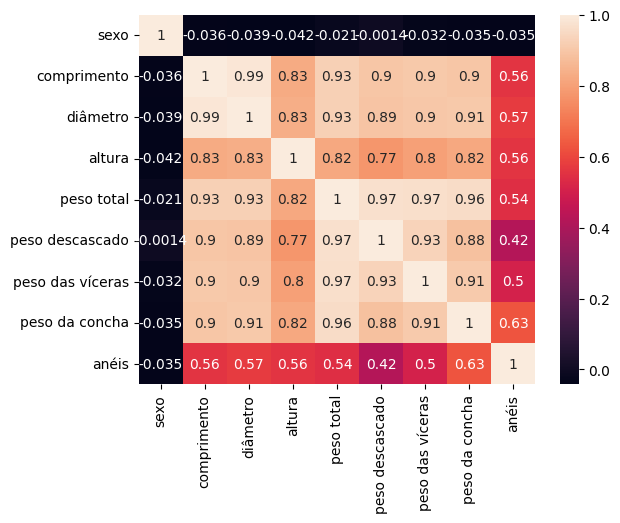

In [ ]:
#Realizando o pré-processamento da coluna sexo:
label_encoder = LabelEncoder()
data_frame['sexo'] = label_encoder.fit_transform(data_frame['sexo'])

#Computando e exibindo uma matriz de correlação:
matriz_correlacao = data_frame.corr()

figura, eixo = plt.subplots()
sns.heatmap(matriz_correlacao, annot=True)
plt.show()

###Criação e aplicação do modelo de previsão

In [ ]:
#Considerando o baixo valor de sexo e do peso descascado, removeremos ambas para a otimização do modelo.
data_frame.drop(columns=['sexo'], inplace=True)

#Criando o modelo:
X = data_frame.drop(columns=['anéis', 'peso descascado']) #Variáveis preditoras
y = data_frame['anéis'] #Variável alvo

In [ ]:
#Separando os dados em dados para treino e teste do modelo:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

resultados = { #Dicionário que receberá o resultado das diferentes previsões
    'KNN': [],
    'MAE': [],
    'MSE': [],
    'RMSE': []
}

#Operando múltiplas previsões até 50 vezes variando o valor de KNN:
for i in range(1, 100, 2):
    modelo_knn = KNeighborsRegressor(n_neighbors=i)
    modelo_knn.fit(X_train, y_train)
    y_previsto = modelo_knn.predict(X_test)
    resultados['KNN'].append(i)
    resultados['MAE'].append(metrics.mean_absolute_error(y_test, y_previsto))
    resultados['MSE'].append(metrics.mean_squared_error(y_test, y_previsto))
    resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y_test, y_previsto)))

###Encontrando e exibindo o melhor resultado

In [ ]:
#Encontrando o melhor valor de KNN que minimiza os erros:

min_mae_index = np.argmin(resultados['MAE'])
min_mse_index = np.argmin(resultados['MSE'])
min_rmse_index = np.argmin(resultados['RMSE'])

melhor_knn_mae = resultados['KNN'][min_mae_index]
melhor_knn_mse = resultados['KNN'][min_mse_index]
melhor_knn_rmse = resultados['KNN'][min_rmse_index]

print(f"O menor valor de MAE é {min(resultados['MAE']):.3f} e o valor de KNN associado é {melhor_knn_mae}")
print(f"O menor valor de MSE é {min(resultados['MSE']):.3f} e o valor de KNN associado é {melhor_knn_mse}")
print(f"O menor valor de RMSE é {min(resultados['RMSE']):.3f} e o valor de KNN associado é {melhor_knn_rmse}")

#Concluí-se, levando em consideração os valores de erro do modelo criado, que o melhor valor de KNN é 29.

O menor valor de MAE é 1.634 e o valor de KNN associado é 29
O menor valor de MSE é 5.458 e o valor de KNN associado é 29
O menor valor de RMSE é 2.336 e o valor de KNN associado é 29


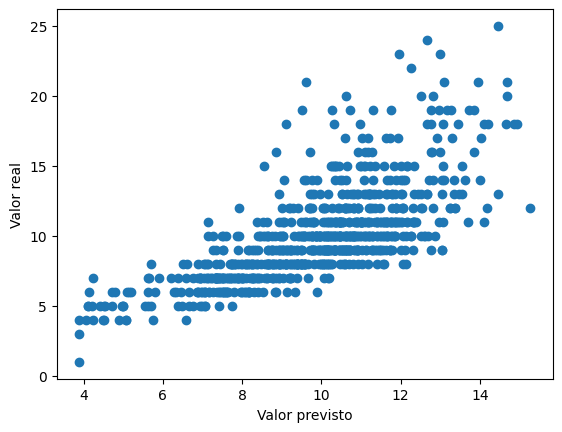

In [ ]:
#Realizando novamente uma previsão com o modelo, mas desta vez com o melhor valor de KNN:
modelo_knn = KNeighborsRegressor(n_neighbors=29)
modelo_knn.fit(X_train, y_train)
y_previsto = modelo_knn.predict(X_test)

#Comparando visualmente o valor real (eixo y) com o valor previsto (eixo x) do melhor valor de KNN:
figura, eixo = plt.subplots()
eixo.scatter(y_previsto, y_test)
eixo.set_xlabel('Valor previsto')
eixo.set_ylabel('Valor real')
plt.show()